# Load a measured B2 Lattice and compute and plot twiss parameters 

Save plots and write data in file

In [1]:
import apace as ap
import matplotlib.pyplot as plt
import math as m
import numpy as np

%matplotlib inline 

Load the B2 lattice and compute twiss with apace

In [2]:
ring = ap.load_lattice('lattices/B2_StdUser_2019_05_07.json')
twiss = ap.Twiss(ring)

Prepare and save the plots

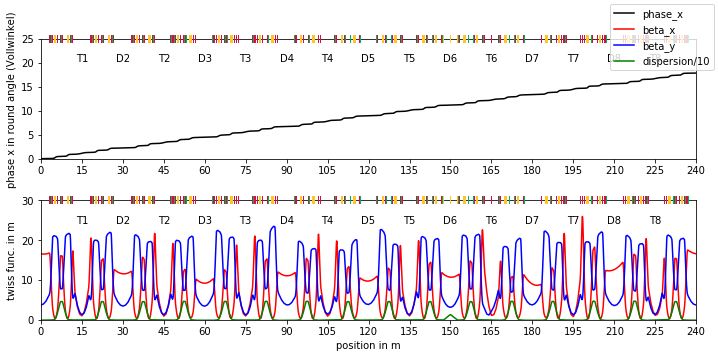

In [3]:
import apace.plot as plot

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 5))

ax1.plot(twiss.s, twiss.psi_x/(2*m.pi), 'black', label="phase_x")
ax1.set_ylim(0.0, 25.0)
ax1.set_xlim(0.0, 240.0)
ax1.set_xticks(np.linspace(0,240,16+1))
ax1.set_ylabel('phase x in round angle (Vollwinkel)')
ax2.set_ylabel('twiss func. in m')
ax2.set_xlabel('position in m')
ax2.set_ylim(0.0, 30.0)
ax2.set_xlim(0.0, 240.0)
ax2.set_xticks(np.linspace(0,240,16+1))

ax2.plot(twiss.s, twiss.beta_x, 'r', label="beta_x")
ax2.plot(twiss.s, twiss.beta_y, 'b', label="beta_y")
ax2.plot(twiss.s, twiss.eta_x * 10.0, 'g',  label="dispersion/10")
ap.plot.paint_lattice(ax1, ring, 0, 240, 0.0, ax1.get_ylim()[1], False, True )
ap.plot.paint_lattice(ax2, ring, 0, 240, 0.0, ax2.get_ylim()[1], False, True )

fig.legend()
fig.tight_layout()

fig.savefig('B2_PhaseX_Twiss.pdf')
fig.savefig('B2_PhaseX_Twiss.png')

In [ ]:
np.savetxt(
    'B2_PhaseX_Twiss.csv',
    np.vstack([twiss.s, twiss.psi_x, twiss.beta_x, twiss.beta_y, twiss.eta_x]).T,
    delimiter=',',
    header = 'position, phase_x, beta_x, beta_y, eta_x '
)